In [4]:
!pip install yfinance

In [32]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import datetime
from datetime import date, timedelta
import yfinance as yf

In [5]:
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=720)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('ADANIGREEN.NS',
                  start=start_date,
                  end=end_date,
                  progress=False)

data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-12,2229.949951,2374.000000,2224.149902,2294.750000,2294.750000,8095252
2022-07-13,2328.000000,2384.000000,2085.000000,2104.750000,2104.750000,6661674
2022-07-14,2160.000000,2188.000000,1931.000000,2087.000000,2087.000000,8953549
2022-07-15,2115.050049,2175.000000,2024.199951,2072.649902,2072.649902,16301850
2022-07-18,2104.699951,2132.600098,2072.649902,2093.250000,2093.250000,3663774


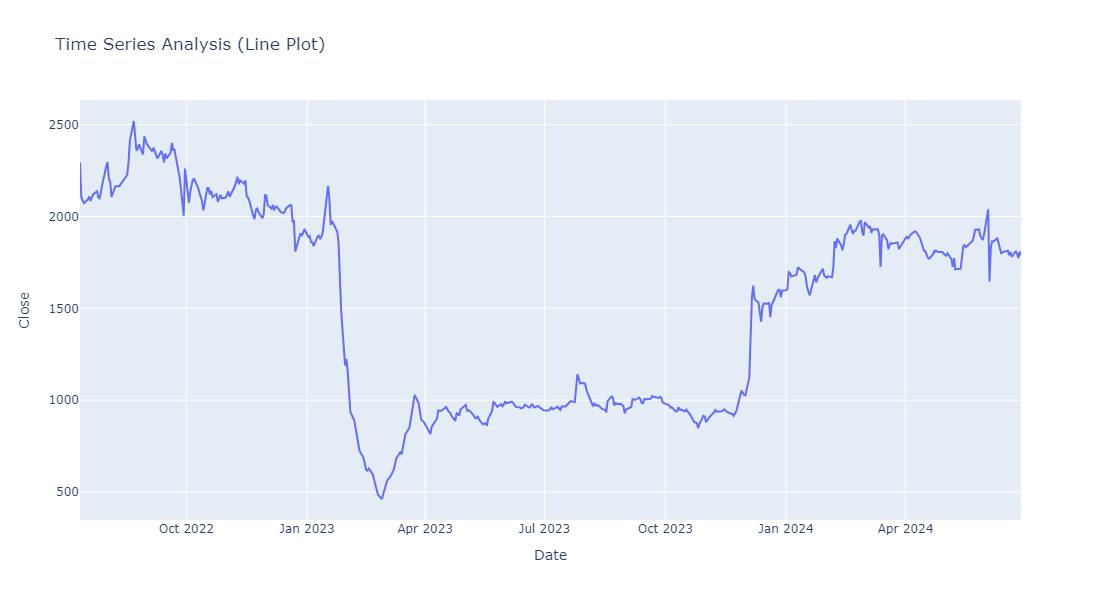

In [33]:
# Visualizing a line plot to see the trends in stock prices of Adani Green Energy
fig = px.line(data, x=data.index,
              y="Close",
              title="Time Series Analysis (Line Plot)")

fig.update_layout(width=800, height=600)

fig.show()

pio.write_html(fig, file='plot.html', auto_open=True)


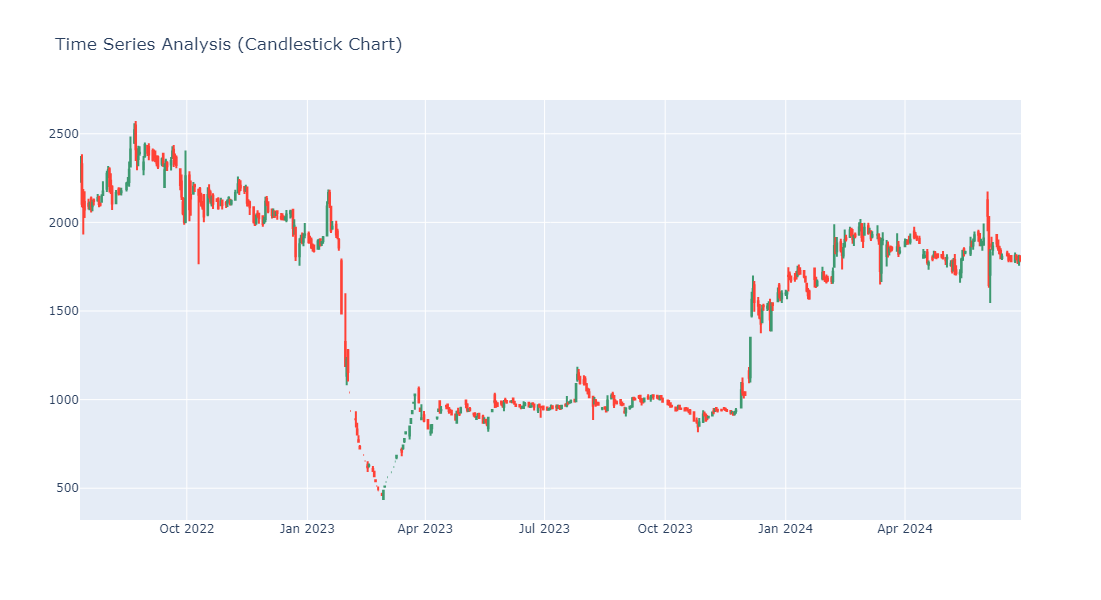

In [20]:
# Visualizing a candlestick chart to see the trends in the open, high, low, and close prices of Adani Green Energy
fig = go.Figure(data=[go.Candlestick(x=data.index,
                                    open=data["Open"],
                                    high=data["High"],
                                    low=data["Low"],
                                    close=data["Close"])])
fig.update_layout(title="Time Series Analysis (Candlestick Chart)",
                 xaxis_rangeslider_visible=False)
fig.update_layout(width=1000, height=600)
fig.show()

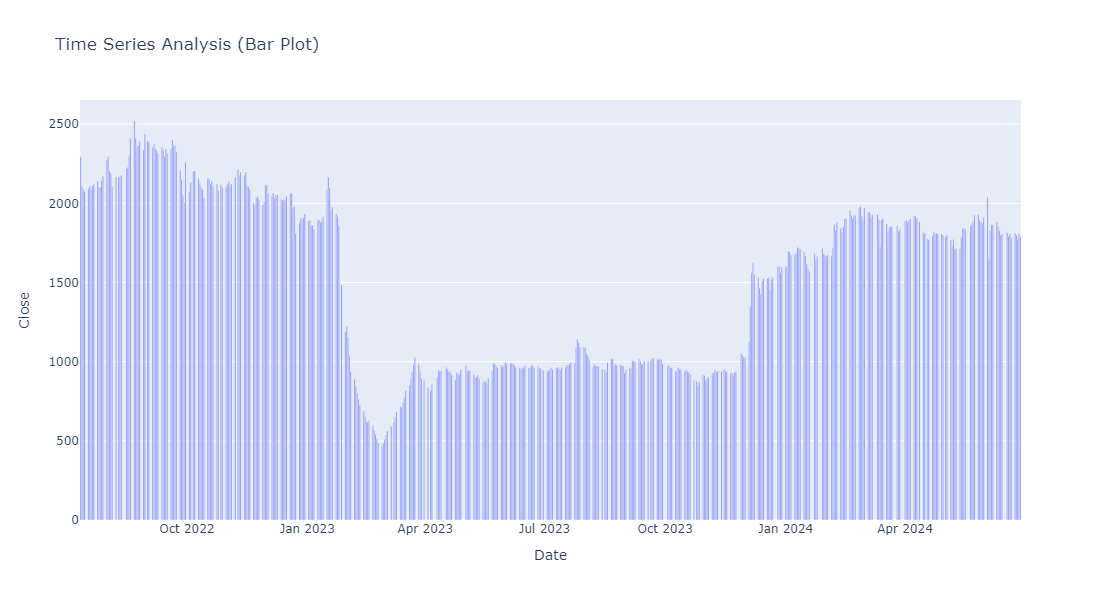

In [13]:
# Visualizing a bar plot to show the trends of close prices over the period
fig = px.bar(data, x=data.index,
            y="Close",
            title="Time Series Analysis (Bar Plot)")
fig.update_layout(width=800, height=600)
fig.show()

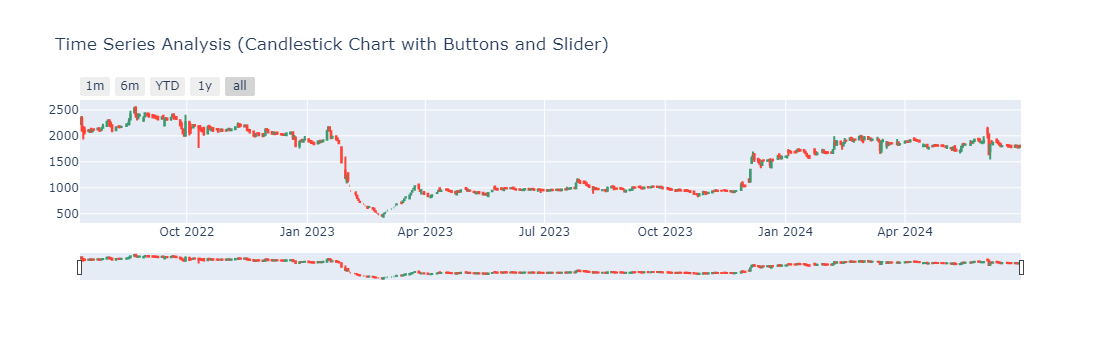

In [15]:
# Finally, let's create an interactive visualization where we can manually select the time interval in the output visualization itself
figure = go.Figure(data = [go.Candlestick(x = data.index,
                                        open = data["Open"], 
                                        high = data["High"],
                                        low = data["Low"], 
                                        close = data["Close"])])
figure.update_layout(title = "Time Series Analysis (Candlestick Chart with Buttons and Slider)")

figure.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
fig.update_layout(width=800, height=600)
figure.show()

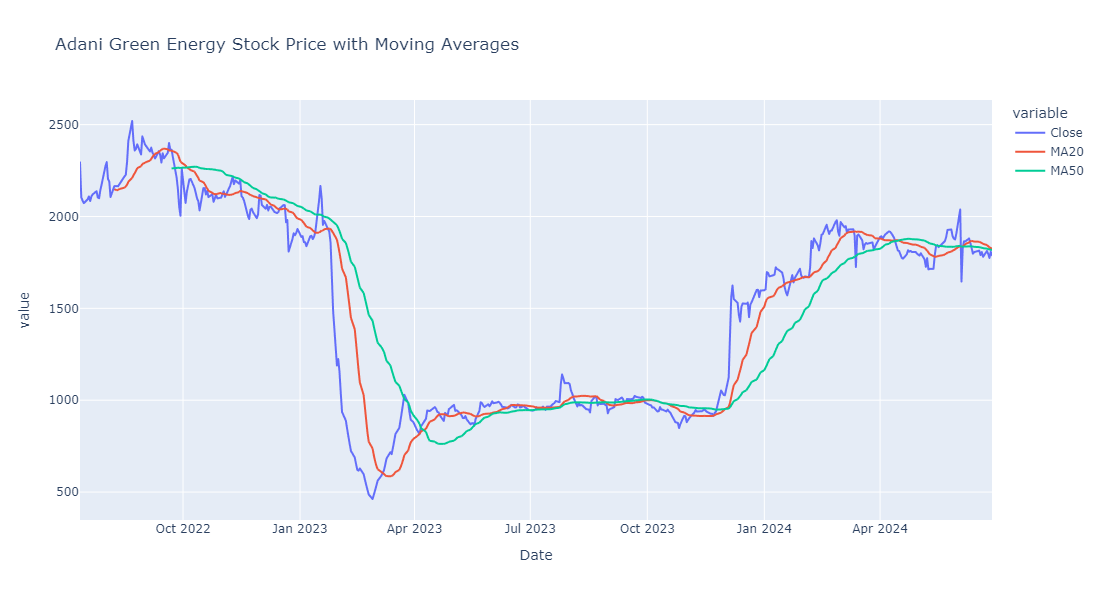

In [19]:
# Adding Moving Average to identify trends more clearly
data["MA20"] = data["Close"].rolling(window=20).mean()
data["MA50"] = data["Close"].rolling(window=50).mean()

fig = px.line(data, x=data.index,
             y=['Close', 'MA20', "MA50"],
             title="Adani Green Energy Stock Price with Moving Averages")
fig.update_layout(width=1000, height=600)
fig.show()

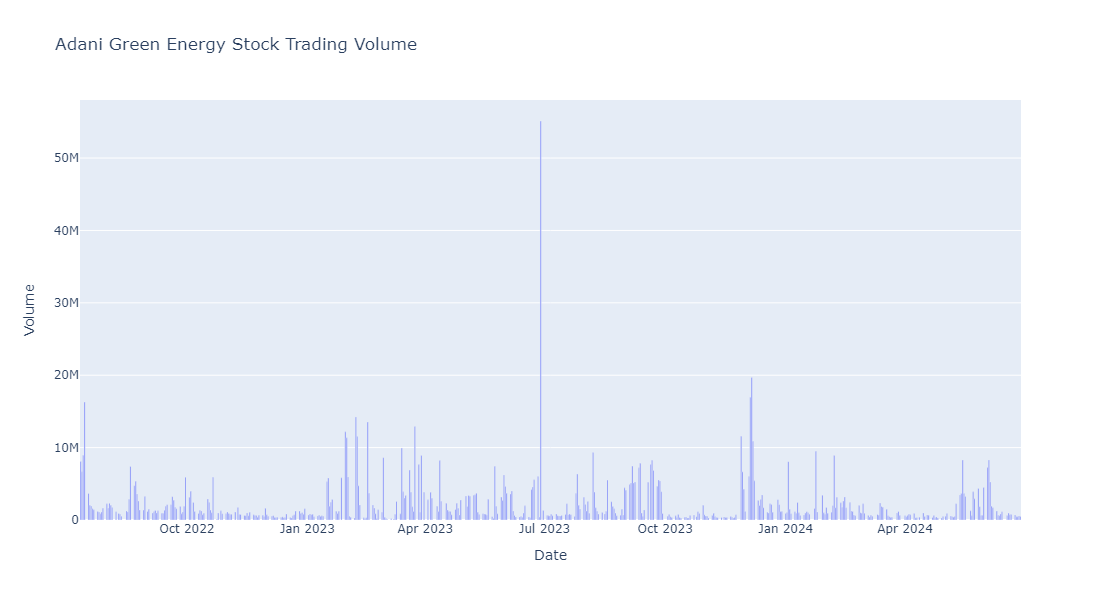

In [22]:
# Analyze trading volume alongside price data
fig = px.bar(data, x=data.index,
            y="Volume", title='Adani Green Energy Stock Trading Volume')
fig.update_layout(width=800, height=600)
fig.show()

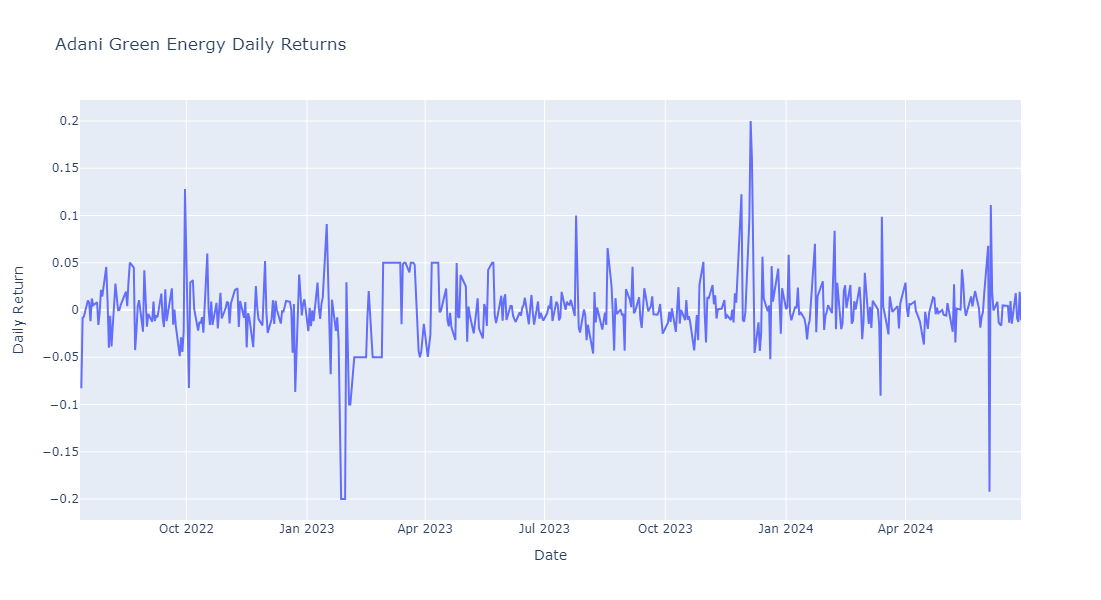

In [26]:
# Calculate performance metrics such as daily returns and volatility
data["Daily Return"] = data['Close'].pct_change()
data['Volatility'] = data["Daily Return"].rolling(window=30).std() * np.sqrt(252)

fig = px.line(data, x=data.index,
             y="Daily Return", title="Adani Green Energy Daily Returns")
fig.update_layout(width=1000, height=600)
fig.show()

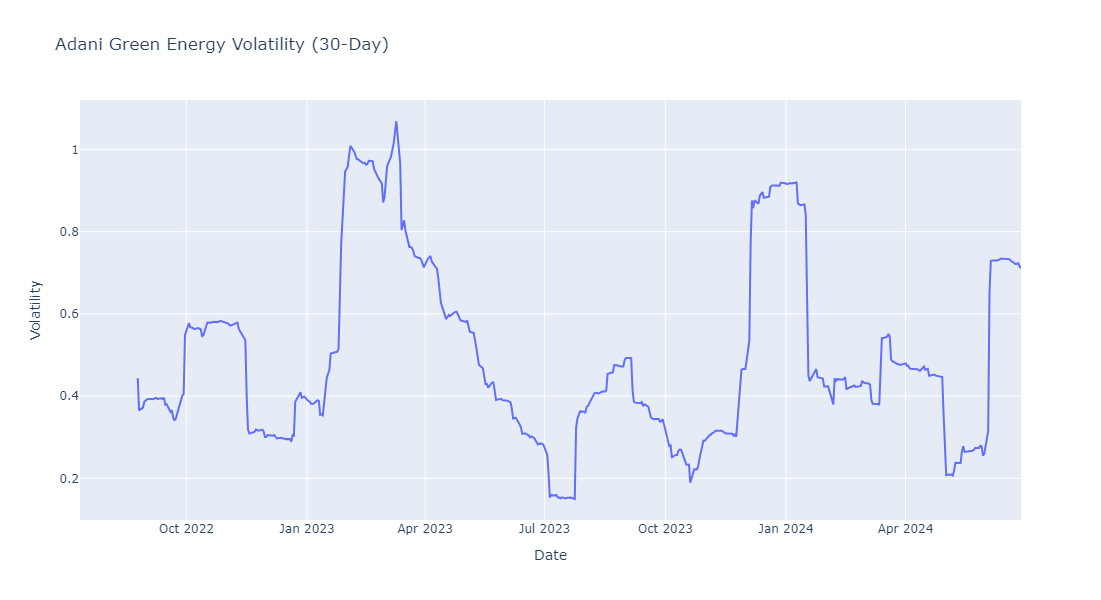

In [27]:
fig = px.line(data, x=data.index,
             y='Volatility', title='Adani Green Energy Volatility (30-Day)')
fig.update_layout(width=1000, height=600)
fig.show()